# AIRJNJ
## Machine Learning

This code does...
 - Pros / Cons of Model types accentuated via:
    - using different features
    - using different train/test split methods (to demonstrate model drift)

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

In [84]:
warnings.filterwarnings('ignore')
# Reset warning filter to default
# warnings.filterwarnings('default')

In [85]:
# df = pd.read_csv('./df.csv', encoding='ISO-8859-1')

df = pd.read_csv('./df.csv',encoding='ISO-8859-1') 

# splitting the ny and paris listings 
ny_listings = df[df['city'].isin(['New York'])] 
paris_listings = df[df['city'].isin(['Paris'])] 

# the price for ny is already in usd, so i just need to copy this column # to create the euro column, i will use the current exchange rate 
ny_listings['price_usd'] = ny_listings['price'] 
ny_listings['price_euro'] = ny_listings['price'] * .9141 
ny_listings[['price', 'price_usd', 'price_euro']].head() 

,price,price_usd,price_euro
9220,110,110,100.5510
9221,99,99,90.4959
9222,220,220,201.1020
9223,215,215,196.5315
9224,300,300,274.2300


In [86]:
# same set up for the paris listings 
paris_listings['price_euro'] = paris_listings['price'] 
paris_listings['price_usd'] = paris_listings['price'] * 1.0938 
paris_listings[['price','price_euro','price_usd']].head() 

,price,price_euro,price_usd
0,53,53,57.9714
1,120,120,131.2560
2,89,89,97.3482
3,58,58,63.4404
4,60,60,65.6280


In [77]:
df = pd.concat([paris_listings, ny_listings]) 

In [79]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       '# w/in 2mi', 'Avg yelp rating', '% Restaurants', 'price_euro',
       'price_usd'],
      dtype='object')

We can choose a couple of targets for machine learning: price and rating of the airbnb listing. So let's prepare two types of dataframes for ML, one with y as price and one with y as the listing's overall rating.

In [190]:
display_columns = ['city', 'district','latitude','longitude', 'price', '# w/in 2mi']
# 'listing_id',  'Avg yelp rating', '% Restaurants'

# filtered_listings = df[(df['district'] == 'Bronx')| (df['district'] == 'Brooklyn')]

ny_data = df[(df['city'] != 'Paris')]
paris_data = df[(df['city'] == 'Paris')]

nycp= df[display_columns]
ny = ny_data[display_columns]
paris = paris_data[display_columns]

ny.head()

,city,district,latitude,longitude,price,# w/in 2mi
9220,New York,Manhattan,40.72120,-73.98893,110,422.0
9221,New York,Manhattan,40.81619,-73.94003,99,221.0
9222,New York,Brooklyn,40.67027,-73.94033,220,188.0
9223,New York,Manhattan,40.72046,-73.99550,215,418.0
9224,New York,Manhattan,40.74610,-73.98632,300,494.0


In [195]:
display_cols = ['city', 'district','latitude','longitude', 'review_scores_rating', '# w/in 2mi']

ny_rate = df[(df['city'] != 'Paris')]
paris_rate = df[(df['city'] == 'Paris')]

nycp_r= df[display_cols]
ny_r = ny_rate[display_cols]
paris_r = paris_rate[display_cols]

ny_r.head()

,city,district,latitude,longitude,review_scores_rating,# w/in 2mi
9220,New York,Manhattan,40.72120,-73.98893,80.0,422.0
9221,New York,Manhattan,40.81619,-73.94003,90.0,221.0
9222,New York,Brooklyn,40.67027,-73.94033,87.0,188.0
9223,New York,Manhattan,40.72046,-73.99550,100.0,418.0
9224,New York,Manhattan,40.74610,-73.98632,93.0,494.0


### EDA
Before jumping into fitting a machine learning model and correlation, let's get some insight on the target (Y) distribution and spread by collecting some statistical descriptions and creating some histograms.

In [197]:
X_ny = ny
y_ny = ny.price
print(X_ny.shape)

X_par = paris
y_par = paris.price
print(X_par.shape)
X_par.head(3)

X_ny.head(3)

(37012, 6)
(64690, 6)


,city,district,latitude,longitude,price,# w/in 2mi
9220,New York,Manhattan,40.72120,-73.98893,110,422.0
9221,New York,Manhattan,40.81619,-73.94003,99,221.0
9222,New York,Brooklyn,40.67027,-73.94033,220,188.0


In [198]:
# Drop rows with NaN values in 'review_scores_rating' column
X_ny_r = ny_r.dropna(subset=['review_scores_rating'])
y_ny_r = X_ny_r.review_scores_rating
print(ny_r.shape,X_ny_r.shape)
X_ny_r.head(3)

(37012, 6) (26777, 6)


,city,district,latitude,longitude,review_scores_rating,# w/in 2mi
9220,New York,Manhattan,40.72120,-73.98893,80.0,422.0
9221,New York,Manhattan,40.81619,-73.94003,90.0,221.0
9222,New York,Brooklyn,40.67027,-73.94033,87.0,188.0


In [199]:
X_paris_r = paris_r.dropna(subset=['review_scores_rating'])
y_paris_r = X_paris_r['review_scores_rating']
print(paris_r.shape,X_paris_r.shape)
X_paris_r.head(3)

(64690, 6) (48036, 6)


,city,district,latitude,longitude,review_scores_rating,# w/in 2mi
0,Paris,NaN,48.88668,2.33343,100.0,310.0
1,Paris,NaN,48.88617,2.34515,100.0,343.0
2,Paris,NaN,48.88112,2.31712,100.0,331.0


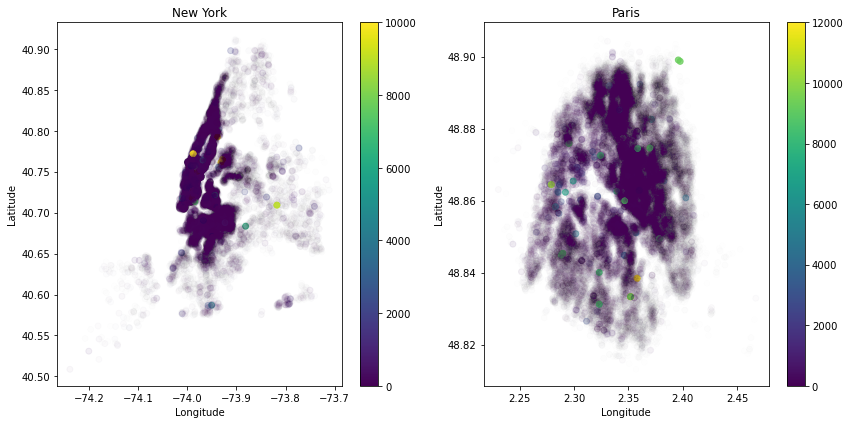

In [200]:
##LOOK AT LOG TRANSFORM FOR MORE OBVIOUS VARIATION

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for New York data with gradient alpha
norm_y_ny = (y_ny - y_ny.min()) / (y_ny.max() - y_ny.min())  # Normalize data to [0, 1]
scatter1 = ax1.scatter(X_ny['longitude'], X_ny['latitude'], c=y_ny, alpha=norm_y_ny, cmap='viridis')
ax1.set_title('New York')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
fig.colorbar(scatter1, ax=ax1)

# Scatter plot for Paris data with gradient alpha
norm_y_par = (y_par - y_par.min()) / (y_par.max() - y_par.min())  # Normalize data to [0, 1]
scatter2 = ax2.scatter(X_par['longitude'], X_par['latitude'], c=y_par, alpha=norm_y_par, cmap='viridis')
ax2.set_title('Paris')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
fig.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

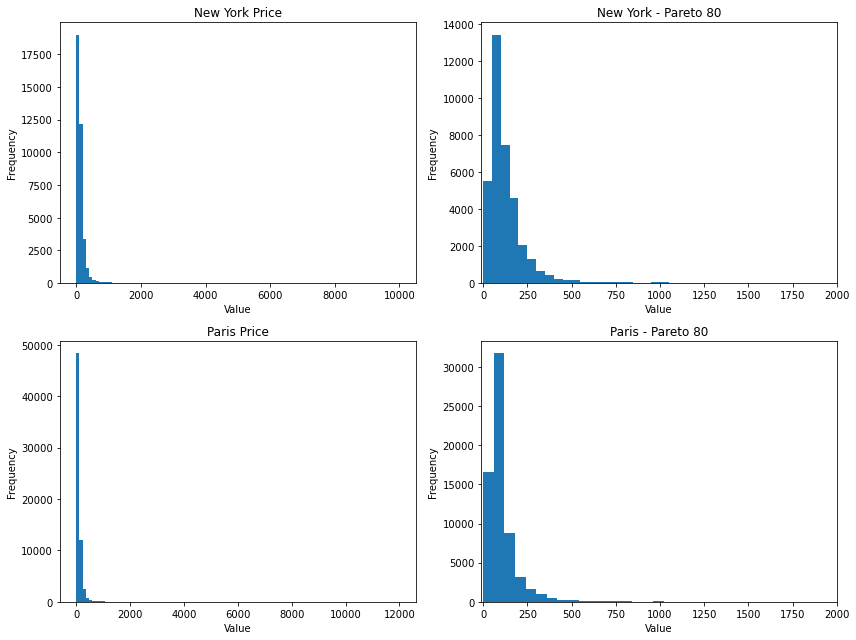

In [201]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 9))

# Plot histograms for New York
ax1.hist(y_ny, bins=100)
ax1.set_title('New York Price')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

ax2.hist(y_ny, bins=200)
ax2.set_title('New York - Pareto 80')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

# Plot histograms for Paris
ax3.hist(y_par, bins=100)
ax3.set_title('Paris Price')
ax3.set_xlabel('Value')
ax3.set_ylabel('Frequency')

ax4.hist(y_par, bins=200)
ax4.set_title('Paris - Pareto 80')
ax4.set_xlabel('Value')
ax4.set_ylabel('Frequency')

ax2.set_xlim(-10, 2000) 
ax4.set_xlim(-10, 2000) 

plt.tight_layout()
plt.show()

In [202]:
description_ny = stats.describe(y_ny)
description_paris = stats.describe(y_par)

print("New York:")
print("Sample Size:", description_ny.nobs)
print("Minimum:", description_ny.minmax[0])
print("Maximum:", description_ny.minmax[1])
print("Mean:", description_ny.mean)
print("Median:", np.median(y_ny))
print("Mode:", stats.mode(y_ny))
print("Variance:", description_ny.variance)
print("Skewness:", description_ny.skewness)
print("Kurtosis:", description_ny.kurtosis)

print("\nParis:")
print("Sample Size:", description_paris.nobs)
print("Minimum:", description_paris.minmax[0])
print("Maximum:", description_paris.minmax[1])
print("Mean:", description_paris.mean)
print("Median:", np.median(y_par))
print("Mode:", stats.mode(y_par))
print("Variance:", description_paris.variance)
print("Skewness:", description_paris.skewness)
print("Kurtosis:", description_paris.kurtosis)

New York:
Sample Size: 37012
Minimum: 0
Maximum: 10000
Mean: 142.84224035447963
Median: 99.0
Mode: ModeResult(mode=array([100], dtype=int64), count=array([1357]))
Variance: 76033.09172520143
Skewness: 21.29072399415241
Kurtosis: 651.6836721039451

Paris:
Sample Size: 64690
Minimum: 0
Maximum: 12000
Mean: 113.09644458185191
Median: 80.0
Mode: ModeResult(mode=array([60], dtype=int64), count=array([3059]))
Variance: 45981.79800711486
Skewness: 29.08692778265061
Kurtosis: 1177.4468871349368


A high positive skewness value indicates that a distribution is skewed or asymmetric.  This means that the distribution has a long tail on the right side and the majority of the data is concentrated on the left side of the distribution.

A high positive kurtosis value indicates that a distribution has heavy tails and a sharp peak compared to a normal distribution. The peak of the distribution is sharper and more pronounced. It also suggests that the distribution has more extreme values and is more prone to outliers compared to a normal distribution.

Variance is a measure of the spread or dispersion of a dataset. It quantifies how far each value in the dataset is from the mean, on average. 

The NY dataset has a higher variance than Paris, meaning the data points are more spread out from the mean. Conversely, the Paris dataset, with a lower variance indicates less variability, with data points tending to be closer to the mean.

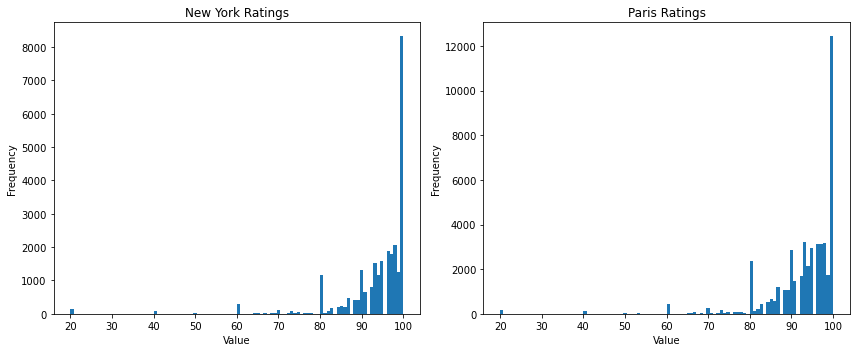

In [203]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot histograms for New York ratings
ax1.hist(y_ny_r, bins=100)
ax1.set_title('New York Ratings')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# Plot histograms for Paris
ax2.hist(y_paris_r, bins=100)
ax2.set_title('Paris Ratings')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [204]:
description_ny_r = stats.describe(y_ny_r)
description_paris_r = stats.describe(y_paris_r)

print("New York:")
print("Sample Size:", description_ny_r.nobs)
print("Minimum:", description_ny_r.minmax[0])
print("Maximum:", description_ny_r.minmax[1])
print("Mean:", description_ny_r.mean)
print("Median:", np.median(y_ny_r))
print("Mode:", stats.mode(y_ny_r)[0])
print("Variance:", description_ny_r.variance)
print("Skewness:", description_ny_r.skewness)
print("Kurtosis:", description_ny_r.kurtosis)

print("\nParis:")
print("Sample Size:", description_paris_r.nobs)
print("Minimum:", description_paris_r.minmax[0])
print("Maximum:", description_paris_r.minmax[1])
print("Mean:", description_paris_r.mean)
print("Median:", np.median(y_paris_r))
print("Mode:", stats.mode(y_paris_r)[0])
print("Variance:", description_paris_r.variance)
print("Skewness:", description_paris_r.skewness)
print("Kurtosis:", description_paris_r.kurtosis)

New York:
Sample Size: 26777
Minimum: 20.0
Maximum: 100.0
Mean: 93.76718825858012
Median: 97.0
Mode: [100.]
Variance: 92.05425200194162
Skewness: -3.840474267466672
Kurtosis: 21.244436860691234

Paris:
Sample Size: 48036
Minimum: 20.0
Maximum: 100.0
Mean: 93.06393121825297
Median: 95.0
Mode: [100.]
Variance: 80.00963187735493
Skewness: -3.3957715927509025
Kurtosis: 19.13227887842865


### Modelling - Baseline

`t`: Training data
`v`: Validation data (a.k.a test data)

In [205]:
# prepare for experiment, only numeric X's, and drop y
num_cols_NY = X_ny.columns[X_ny.dtypes != 'object']
X_ny_num=X_ny[num_cols_NY].dropna()
y_ny = X_ny_num['price']
num_cols_NY = num_cols_NY.drop('price')
X_ny_num = X_ny_num[num_cols_NY]

num_cols_P = X_par.columns[X_par.dtypes != 'object']
X_p_num=X_par[num_cols_P].dropna()
y_par = X_p_num['price']
num_cols_P = num_cols_P.drop('price')
X_p_num= X_p_num[num_cols_P]

In [269]:
description_ny = stats.describe(X_ny['# w/in 2mi'])
description_paris = stats.describe(X_par['# w/in 2mi'])

# print("New York:")
# print("Sample Size:", description_ny.nobs)
# print("Minimum:", description_ny.minmax[0])
# print("Maximum:", description_ny.minmax[1])
# print("Mean:", description_ny.mean)
# print("Median:", np.median(y_ny))
# print("Mode:", stats.mode(y_ny))
# print("Variance:", description_ny.variance)
# print("Skewness:", description_ny.skewness)
# print("Kurtosis:", description_ny.kurtosis)

print("\nParis:")
print("Sample Size:", description_paris.nobs)
print("Minimum:", description_paris.minmax[0])
print("Maximum:", description_paris.minmax[1])
print("Mean:", description_paris.mean)
print("Median:", np.median(y_par))
print("Mode:", stats.mode(y_par))
print("Variance:", description_paris.variance)
print("Skewness:", description_paris.skewness)
print("Kurtosis:", description_paris.kurtosis)


Paris:
Sample Size: 64690
Minimum: 0.0
Maximum: 555.0
Mean: 332.7931983304993
Median: 80.0
Mode: ModeResult(mode=array([60], dtype=int64), count=array([3059]))
Variance: 17505.813498543266
Skewness: 0.01426377244829344
Kurtosis: -1.1528711023548717


In [268]:
## WILL'S FEEDBACK AT OFFICE HOURS

## ADD RATING OF LISTING TO PRICE MODEL
## RUN LINEAR REGRESSION FIRST FOR BASELINE 

## TAKE OUT TOP 5% $$$ LISTINGS
## STANDARD SCALAR ON THE LAT/LONG BEFORE KNN

## GO TO JUST GEO FEATURES FOR KNN 
## MAYBE TRY REMOVING LOW RATINGS OR FILTERING OUT OTHER OUTLIERS THAT COULD BE THROWING MODEL OFF

In [225]:
Xt, Xv, yt, yv = train_test_split(X_ny_num, y_ny, random_state=0, test_size=0.2)
print(Xt.shape,Xv.shape, yt.shape, yv.shape)
Xt.head(3)

(29378, 3) (7345, 3) (29378,) (7345,)


,latitude,longitude,# w/in 2mi
11713,40.67422,-73.95569,267.0
50390,40.70660,-73.92115,155.0
34250,40.75286,-73.93490,185.0


In [241]:
Xt1, Xv1, yt1, yv1 = train_test_split(X_p_num, y_par, random_state=0, test_size=0.2)
print(Xt1.shape,Xv1.shape, yt1.shape, yv1.shape)
Xt1.head(3)

(51752, 3) (12938, 3) (51752,) (12938,)


,latitude,longitude,# w/in 2mi
62443,48.86168,2.35170,536.0
91873,48.87210,2.36445,520.0
28588,48.88541,2.33864,328.0


In [226]:
Xv.head()

,latitude,longitude,# w/in 2mi
73909,40.74817,-73.97707,492.0
19307,40.84696,-73.89053,89.0
59699,40.68744,-73.90824,147.0
35086,40.76044,-73.96852,438.0
90411,40.66079,-73.91008,76.0


In [185]:
from sklearn.neighbors import KNeighborsRegressor

In [227]:
knn = KNeighborsRegressor()

In [243]:
# Train the classifier on the training data
# knn.fit(Xt, yt)
knn.fit(Xt1,yt1)

KNeighborsRegressor()

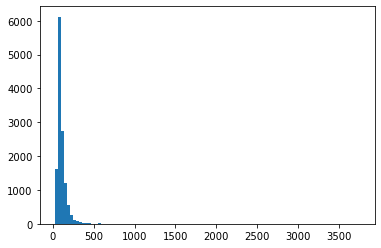

In [245]:
# Predict the labels for the validation data
# predictions = knn.predict(Xv)
predictions1 = knn.predict(Xv1)

# plt.hist(predictions, bins=100);
plt.hist(predictions1, bins=100);

# oopsie - check .predict maxes
# plt.hist(lr.predict(Xv), bins=100);
# .max()

In [230]:
print(list(Xt.columns))

['latitude', 'longitude', '# w/in 2mi']


In [246]:
geo_cols = ['latitude', 'longitude']
non_geo_cols = [c for c in Xt.columns if c not in geo_cols]
non_geo_cols = [c for c in Xt1.columns if c not in geo_cols]
geo_cols, non_geo_cols

(['latitude', 'longitude'], ['# w/in 2mi'])

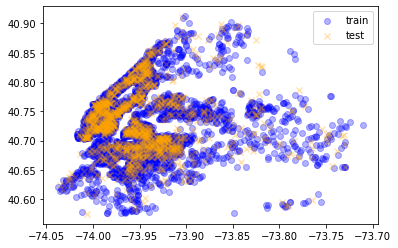

In [213]:
# what we did the first time, now with 50/50 split
# Xt, Xv, yt, yv = train_test_split(X, y, random_state=0, test_size=0.5)
Xtt = Xt.sample(frac=0.2, random_state=0)
Xvt = Xv.sample(frac=0.2, random_state=0)
plt.scatter(Xtt['longitude'], Xtt['latitude'], c='blue', label='train', alpha=0.3);
plt.scatter(Xvt['longitude'], Xvt['latitude'], c='orange', label='test', alpha=0.3, marker='x');
plt.legend();

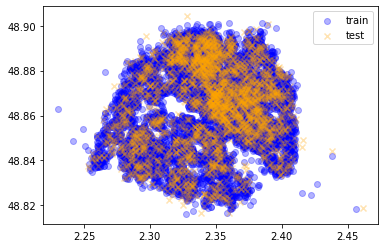

In [247]:
# what we did the first time, now with 50/50 split
# Xt, Xv, yt, yv = train_test_split(X, y, random_state=0, test_size=0.5)
Xtt1 = Xt1.sample(frac=0.2, random_state=0)
Xvt1 = Xv1.sample(frac=0.2, random_state=0)
plt.scatter(Xtt1['longitude'], Xtt1['latitude'], c='blue', label='train', alpha=0.3);
plt.scatter(Xvt1['longitude'], Xvt1['latitude'], c='orange', label='test', alpha=0.3, marker='x');
plt.legend();

In [261]:
knn = KNeighborsRegressor(n_neighbors=20)

In [262]:
knn.fit(Xt[geo_cols],yt)
display(knn.score(Xv[geo_cols],yv))

knn.fit(Xt1[geo_cols],yt1)
knn.score(Xv1[geo_cols],yv1)

-0.013324186152945616

0.006871767985194399

In [263]:
knn.fit(Xt[non_geo_cols],yt)
display(knn.score(Xv[non_geo_cols],yv))

knn.fit(Xt1[non_geo_cols],yt1)
knn.score(Xv1[non_geo_cols],yv1)

-0.011763177102773081

-0.03819036827956146

In [265]:
knn.fit(Xt,yt)
knn.score(Xv,yv)

knn.fit(Xt1,yt1)
knn.score(Xv1,yv1)

-0.021649558192098572

In [267]:
score = knn.score(Xv, yv)
print("score NY:", score)

score1 = knn.score(Xv1, yv1)
print("score Paris:", score1)


score NY: -0.053082209389087476
score Paris: -0.021649558192098572
